In [1]:
from pydeseq2.dds import DeseqDataSet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from pydeseq2.ds import DeseqStats
from statsmodels.stats.multitest import multipletests
import openpyxl
from adjustText import adjust_text

In [2]:
counts = pd.read_csv('Proteomics_Data_Dummy.csv')
counts

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
1,P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4
2,P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0
3,P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
4,P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...,...
2127,P12127,Protein 2128,14.0,8.3,14.6,9.6,NaN,314.8
2128,P12128,Protein 2129,NaN,NaN,NaN,NaN,NaN,NaN
2129,P12129,Protein 2130,NaN,NaN,NaN,NaN,NaN,NaN
2130,P12130,Protein 2131,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove rows that contain any NaN values
counts = counts.dropna()
counts

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
1,P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4
2,P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0
3,P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
4,P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...,...
2100,P12100,Protein 2101,194.3,239.9,353.8,6.3,11.2,11.5
2101,P12101,Protein 2102,201.8,202.7,270.5,7.8,6.5,4.3
2111,P12111,Protein 2112,183.2,50.9,64.1,163.9,131.0,89.1
2123,P12123,Protein 2124,23.1,27.9,30.7,9.8,10.4,13.4


In [4]:
counts = counts.set_index(['Accession', 'Description'])
counts

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,Description,,,,,,
P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0
P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4
P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0
P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2
P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5
...,...,...,...,...,...,...,...
P12100,Protein 2101,194.3,239.9,353.8,6.3,11.2,11.5
P12101,Protein 2102,201.8,202.7,270.5,7.8,6.5,4.3
P12111,Protein 2112,183.2,50.9,64.1,163.9,131.0,89.1


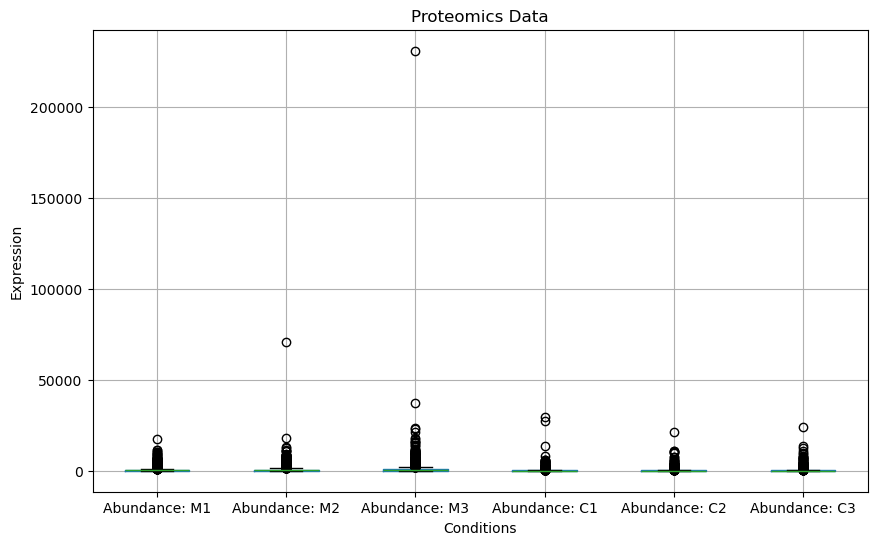

In [5]:
# Plot a boxplot for all proteins
counts.boxplot(figsize=(10, 6))  # You can adjust the figsize for larger datasets

# Add labels and title
plt.title('Proteomics Data')
plt.xlabel('Conditions')
plt.ylabel('Expression')

# Show the plot
plt.show()

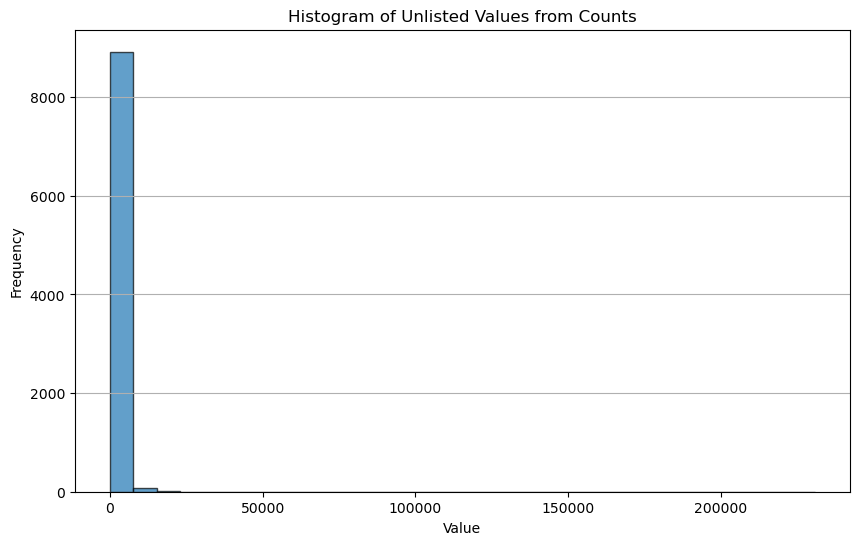

In [6]:
unlisted_data = counts.values.flatten()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(unlisted_data, bins=30, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Histogram of Unlisted Values from Counts')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

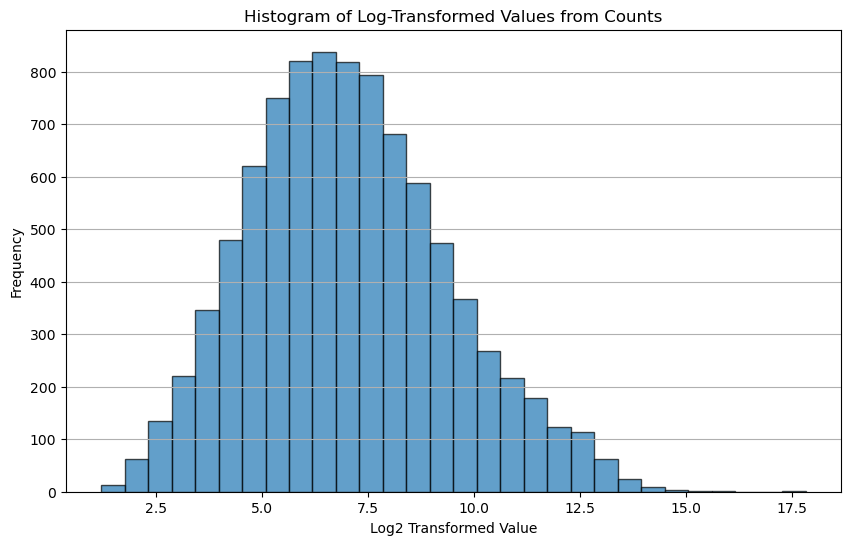

In [7]:
log_transformed_data = np.log2(counts + 1)

# Flatten the log-transformed data
unlisted_log_data = log_transformed_data.values.flatten()  # Use .values to get a NumPy array and flatten it

# Create a histogram of the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(unlisted_log_data, bins=30, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Histogram of Log-Transformed Values from Counts')
plt.xlabel('Log2 Transformed Value')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

In [8]:
counts_log = np.log2(counts + 1)
counts_log = counts_log.T
counts_log.T

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,Description,,,,,,
P10000,Protein 1,10.920948,16.111816,17.816137,11.150192,10.894515,11.760304
P10001,Protein 2,9.970106,13.679513,15.178338,9.591148,9.288635,9.490650
P10002,Protein 3,9.524542,12.686391,14.506562,8.303324,8.180904,10.101976
P10003,Protein 4,12.849952,12.603835,12.789106,13.724023,12.183263,12.115434
P10004,Protein 5,6.153805,10.470456,12.520668,5.697663,4.572890,5.569856
...,...,...,...,...,...,...,...
P12100,Protein 2101,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
P12101,Protein 2102,7.663914,7.670302,8.084808,3.137504,2.906891,2.405992
P12111,Protein 2112,7.525129,5.697663,6.024586,7.365448,7.044394,6.493455


In [9]:
counts_log

Accession,P10000,P10001,P10002,P10003,P10004,P10005,P10006,P10007,P10009,P10010,...,P12076,P12078,P12084,P12086,P12092,P12100,P12101,P12111,P12123,P12126
Description,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,Protein 8,Protein 10,Protein 11,...,Protein 2077,Protein 2079,Protein 2085,Protein 2087,Protein 2093,Protein 2101,Protein 2102,Protein 2112,Protein 2124,Protein 2127
Abundance: M1,10.920948,9.970106,9.524542,12.849952,6.153805,8.909293,8.668885,12.161888,12.459867,7.532940,...,9.644397,3.185867,1.887525,6.980711,7.312883,7.609548,7.663914,7.525129,4.590961,6.543805
Abundance: M2,16.111816,13.679513,12.686391,12.603835,10.470456,12.081084,12.408913,12.286240,11.445118,7.566054,...,7.394891,5.169925,6.205549,6.298292,6.806066,7.912291,7.670302,5.697663,4.852998,6.539159
Abundance: M3,17.816137,15.178338,14.506562,12.789106,12.520668,14.112106,14.083670,12.485251,12.806429,8.365010,...,8.564912,7.025693,7.628628,7.888743,7.426265,8.470862,8.084808,6.024586,4.986411,6.683696
Abundance: C1,11.150192,9.591148,8.303324,13.724023,5.697663,8.510171,8.666757,12.344407,12.454042,14.739628,...,7.627169,2.632268,2.350497,7.034524,6.431289,2.867896,3.137504,7.365448,3.432959,2.963474
Abundance: C2,10.894515,9.288635,8.180904,12.183263,4.572890,8.718704,8.234099,12.873982,11.923142,10.894590,...,7.445429,2.678072,2.350497,6.488644,6.040016,3.608809,2.906891,7.044394,3.510962,2.459432
Abundance: C3,11.760304,9.490650,10.101976,12.115434,5.569856,9.246978,8.599913,12.728665,12.360161,13.388636,...,8.318769,2.608809,3.711495,7.482203,6.274262,3.643856,2.405992,6.493455,3.847997,2.485427


In [10]:
scaler = StandardScaler()
counts_scaled = scaler.fit_transform(counts_log)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(counts_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
explained_variance

array([6.40857268e-01, 1.57090181e-01, 9.71108367e-02, 6.52172141e-02,
       3.97245006e-02, 1.01856776e-32])

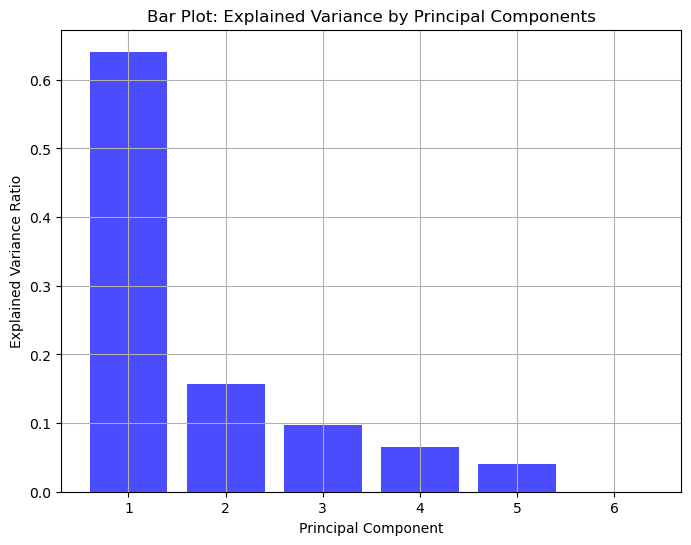

In [11]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.title('Bar Plot: Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))  # Set x-axis ticks to match component numbers
plt.grid(True)
plt.show()

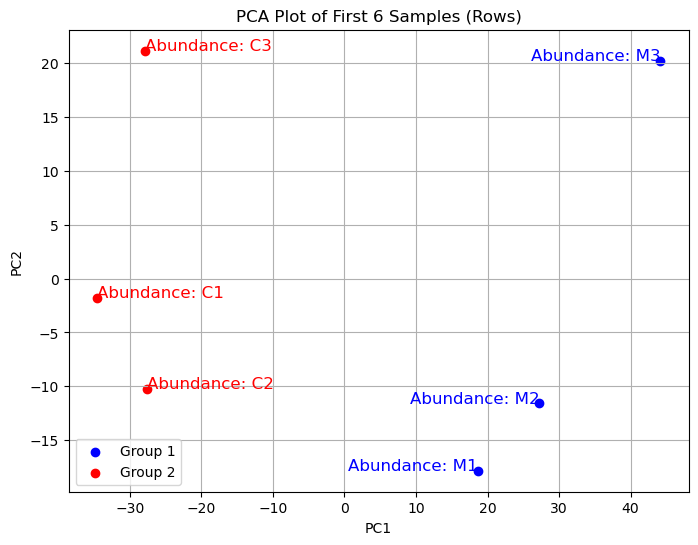

In [12]:
col1 = "blue"  # Group 1 color
col2 = "red"   # Group 2 color

# Prepare the scatter plot for the first 6 rows (samples)
plt.figure(figsize=(8,6))

# Plot the first 3 samples (rows 1-3) from Group 1
plt.scatter(principal_components[0:3, 0], principal_components[0:3, 1], color=col1, label='Group 1')

# Plot the next 3 samples (rows 4-6) from Group 2
plt.scatter(principal_components[3:6, 0], principal_components[3:6, 1], color=col2, label='Group 2')

# Add labels for Group 1 (first 3 rows)
for i in range(3):
    plt.text(principal_components[i, 0], principal_components[i, 1], counts_log.index[i], 
             color=col1, fontsize=12, ha='right')

# Add labels for Group 2 (next 3 rows)
for i in range(3, 6):
    plt.text(principal_components[i, 0], principal_components[i, 1], counts_log.index[i], 
             color=col2, fontsize=12, ha='left')

# Labels for axes
plt.xlabel("PC1")
plt.ylabel("PC2")

# Add legend and show plot
plt.legend()
plt.grid(True)
plt.title("PCA Plot of First 6 Samples (Rows)")
plt.show()

In [13]:
# Calculate the mean across columns 1 to 3 (M) and columns 4 to 6 (Hypoxia)
mean_M = counts.iloc[:, 0:3].mean(axis=1)
mean_C = counts.iloc[:, 3:6].mean(axis=1)

# Create a new DataFrame with Accession, counts, mean_C, and mean_M
counts_out = pd.concat([
    counts,               # Adding the entire exprdata DataFrame
    mean_M.rename('mean_M'),  # Adding mean_M column
    mean_C.rename('mean_C')   # Adding mean_C column
], axis=1)

# Display the first few rows (equivalent to head() in R)
counts_out.head()

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3,mean_M,mean_C
Accession,Description,,,,,,,,
P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333
P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667
P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667
P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000
P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667


In [14]:
# Add a new column for log2 Fold Change (log2FC)
counts_out['log2FC'] = np.log2(counts_out['mean_M'] / counts_out['mean_C'])

# Display the first few rows
counts_out.head()

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3,mean_M,mean_C,log2FC
Accession,Description,,,,,,,,,
P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687
P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708
P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196
P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952
P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824


In [15]:
# Define the Fold Change threshold
FC = 2  # Change this value as needed

# Filter the DataFrame for log2FC > FC
upregulated = counts_out[counts_out['log2FC'] > FC]

# Filter the DataFrame for log2FC < -FC
downregulated = counts_out[counts_out['log2FC'] < -FC]

# Display the results
print("Upregulated genes (log2FC > FC):")
print(upregulated)

print("\nDownregulated genes (log2FC < -FC):")
print(downregulated)

Upregulated genes (log2FC > FC):
                        Abundance: M1  Abundance: M2  Abundance: M3  \
Accession Description                                                 
P10000    Protein 1            1937.8        70816.4       230775.6   
P10001    Protein 2            1002.0        13119.3        37078.6   
P10002    Protein 3             735.5         6590.5        23275.1   
P10004    Protein 5              70.2         1417.8         5875.2   
P10005    Protein 6             479.8         4331.8        17706.9   
...                               ...            ...            ...   
P12078    Protein 2079            8.1           35.0          129.3   
P12084    Protein 2085            2.7           72.8          196.9   
P12100    Protein 2101          194.3          239.9          353.8   
P12101    Protein 2102          201.8          202.7          270.5   
P12126    Protein 2127           92.3           92.0          101.8   

                        Abundance: C1  Abun

In [16]:
# Define a function to perform t-test and return p-value
def get_pvalue(row):
    # Perform t-test on the first three and last three elements
    return stats.ttest_ind(row[:3], row[3:]).pvalue

# Apply the function to each row in exprdata_log
p_values = counts_log.T.apply(get_pvalue, axis=1)

# Add p-values to exprdata_out
counts_out['pvalue'] = p_values

# Display the updated exprdata_out DataFrame
counts_out

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3,mean_M,mean_C,log2FC,pvalue
Accession,Description,,,,,,,,,,
P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879
P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823
P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739
P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644
P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941
...,...,...,...,...,...,...,...,...,...,...,...
P12100,Protein 2101,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206
P12101,Protein 2102,201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041
P12111,Protein 2112,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957


In [17]:
# Apply FDR adjustment using Benjamini-Hochberg method
counts_out['fdr'] = multipletests(counts_out['pvalue'], method='fdr_bh')[1]

# Display the updated DataFrame
counts_out

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3,mean_M,mean_C,log2FC,pvalue,fdr
Accession,Description,,,,,,,,,,,
P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005
P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070
P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859
P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194
P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782
...,...,...,...,...,...,...,...,...,...,...,...,...
P12100,Protein 2101,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692
P12101,Protein 2102,201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448
P12111,Protein 2112,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836


In [18]:
# Define the threshold
alfa = 0.05  # Change this value as needed

# Count how many p-values and fdr values are below the threshold
count_pvalue_below_alfa = (counts_out['pvalue'] < alfa).sum()
count_fdr_below_alfa = (counts_out['fdr'] < alfa).sum()

# Display the results
print(f"Number of p-values below {alfa}: {count_pvalue_below_alfa}")
print(f"Number of FDR values below {alfa}: {count_fdr_below_alfa}")

Number of p-values below 0.05: 800
Number of FDR values below 0.05: 686


In [19]:
filtered_set = counts_log.T[counts_out['fdr'] < 0.05]
filtered_set

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,Description,,,,,,
P10010,Protein 11,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
P10011,Protein 12,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P10012,Protein 13,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
P10014,Protein 15,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P10018,Protein 19,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...,...
P12092,Protein 2093,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
P12100,Protein 2101,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
P12101,Protein 2102,7.663914,7.670302,8.084808,3.137504,2.906891,2.405992


In [20]:
allcounts_out = counts_out.reset_index()
allcounts_out

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3,mean_M,mean_C,log2FC,pvalue,fdr
0,P10000,Protein 1,1937.8,70816.4,230775.6,2271.7,1902.6,3468.0,101176.600000,2547.433333,5.311687,0.152879,0.221005
1,P10001,Protein 2,1002.0,13119.3,37078.6,770.3,624.4,718.4,17066.633333,704.366667,4.598708,0.087823,0.143070
2,P10002,Protein 3,735.5,6590.5,23275.1,314.9,289.2,1098.0,10200.366667,567.366667,4.168196,0.099739,0.157859
3,P10003,Protein 4,7381.8,6223.9,7076.9,13530.4,4649.8,4436.2,6894.200000,7538.800000,-0.128952,0.896644,0.926194
4,P10004,Protein 5,70.2,1417.8,5875.2,50.9,22.8,46.5,2454.400000,40.066667,5.936824,0.080941,0.134782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,P12100,Protein 2101,194.3,239.9,353.8,6.3,11.2,11.5,262.666667,9.666667,4.764071,0.000206,0.002692
1498,P12101,Protein 2102,201.8,202.7,270.5,7.8,6.5,4.3,225.000000,6.200000,5.181513,0.000041,0.001448
1499,P12111,Protein 2112,183.2,50.9,64.1,163.9,131.0,89.1,99.400000,128.000000,-0.364826,0.421957,0.507836
1500,P12123,Protein 2124,23.1,27.9,30.7,9.8,10.4,13.4,27.233333,11.200000,1.281875,0.002150,0.010002


In [21]:
# Set row names based on the 'Accession' column in exprdata_out
filtered_set.index = allcounts_out[allcounts_out['fdr'] < 0.05]['Accession']
filtered_set

,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,,,,,,
P10010,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
P10011,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P10012,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
P10014,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P10018,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...
P12092,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
P12100,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
P12101,7.663914,7.670302,8.084808,3.137504,2.906891,2.405992


In [22]:
set_out = filtered_set.reset_index()
set_out

,Accession,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,P10010,7.532940,7.566054,8.365010,14.739628,10.894590,13.388636
1,P10011,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
2,P10012,10.600842,10.600842,10.752130,11.980889,11.813661,12.677962
3,P10014,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
4,P10018,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
...,...,...,...,...,...,...,...
681,P12092,7.312883,6.806066,7.426265,6.431289,6.040016,6.274262
682,P12100,7.609548,7.912291,8.470862,2.867896,3.608809,3.643856
683,P12101,7.663914,7.670302,8.084808,3.137504,2.906891,2.405992
684,P12123,4.590961,4.852998,4.986411,3.432959,3.510962,3.847997


In [23]:
# Convert filtered_set to a NumPy matrix (heatdata2)
heatdata2 = set_out.values

# Show the matrix
heatdata2

array([['P10010', 7.532940288372874, 7.5660540381710915, ...,
        14.739627684431, 10.894590430002713, 13.388636219462803],
       ['P10011', 12.267723051627422, 12.433507201770833, ...,
        10.303324126859511, 11.033973543441055, 9.431079674057884],
       ['P10012', 10.600842114387302, 10.600842114387302, ...,
        11.980889298541905, 11.813660961620661, 12.677961832017077],
       ...,
       ['P12101', 7.663913842115978, 7.670302170078526, ...,
        3.137503523749935, 2.9068905956085187, 2.4059923596758366],
       ['P12123', 4.590961241342599, 4.8529975876133165, ...,
        3.4329594072761065, 3.5109619192773796, 3.84799690655495],
       ['P12126', 6.543805175964397, 6.539158811108031, ...,
        2.963474123974886, 2.4594316186372973, 2.4854268271702415]],
      dtype=object)

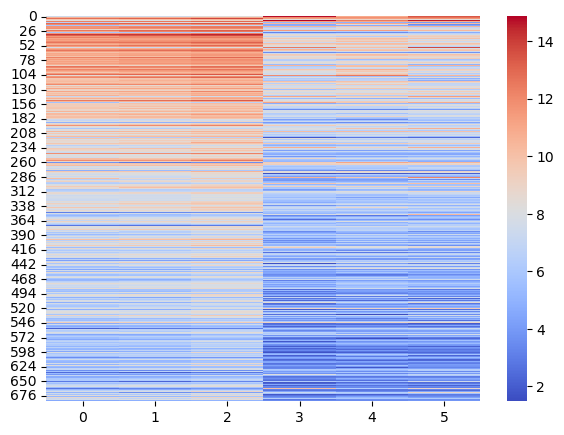

In [24]:
# Filter out non-numeric columns from filtered_set
heatdata2_numeric = set_out.select_dtypes(include=[float, int]).to_numpy()

# Create the heatmap with numeric data
plt.figure(figsize=(7, 5))  # Adjust the figure size
sns.heatmap(heatdata2_numeric, cmap='coolwarm', cbar=True)

# Display the plot
plt.show()

In [25]:
# Filter the data for fdr < 0.05 and log2FC conditions
filtered_set_upregulated = counts_log.T[(counts_out['fdr'] < 0.05) & (counts_out['log2FC'] > 0)]
filtered_set_downregulated = counts_log.T[(counts_out['fdr'] < 0.05) & (counts_out['log2FC'] < 0)]

# Combine the upregulated and downregulated sets
filtered_setdiff = pd.concat([filtered_set_upregulated, filtered_set_downregulated], axis=0)
filtered_setdiff

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,Description,,,,,,
P10011,Protein 12,12.267723,12.433507,12.484571,10.303324,11.033974,9.431080
P10014,Protein 15,12.746556,13.049185,13.804494,11.287828,11.317413,11.637259
P10018,Protein 19,9.634630,10.151397,10.385000,7.157852,6.944858,7.181898
P10019,Protein 20,9.786270,10.142107,10.530211,8.159871,8.935165,8.295998
P10021,Protein 22,13.496330,13.606463,13.952286,9.367852,9.128768,9.181401
...,...,...,...,...,...,...,...
P11797,Protein 1798,3.906891,4.129283,4.217231,8.186857,5.916477,6.867896
P11860,Protein 1861,2.944858,2.263034,3.307429,6.261155,5.658211,7.496654
P11934,Protein 1935,2.744161,3.350497,3.847997,10.097505,6.350497,8.805744


In [26]:
# Filter the data for fdr < 0.05
filtered_counts_out = counts_out[counts_out['fdr'] < 0.05]

# Select most upregulated (top 25) and downregulated (top 25) proteins
top_25_upregulated = filtered_counts_out.nlargest(25, 'log2FC')
top_25_downregulated = filtered_counts_out.nsmallest(25, 'log2FC')

# Keep the counts_log.T for the selected proteins
upregulated_proteins25 = counts_log.T.loc[top_25_upregulated.index]
downregulated_proteins25 = counts_log.T.loc[top_25_downregulated.index]

# Combine the top 25 upregulated and downregulated proteins
combined_updownproteins25 = pd.concat([upregulated_proteins25, downregulated_proteins25])

In [27]:
combined_updownproteins25

,,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
Accession,Description,,,,,,
P10472,Protein 473,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935
P10493,Protein 494,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772
P10474,Protein 475,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757
P10139,Protein 140,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535
P10539,Protein 540,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337
P10261,Protein 262,11.656738,11.259743,11.732591,5.247928,4.877744,4.791814
P10165,Protein 166,12.456585,12.900848,13.297490,6.551516,6.646739,5.997744
P11551,Protein 1552,7.965207,7.205549,8.791163,1.722466,2.070389,2.321928
P10076,Protein 77,14.109325,14.155103,14.469069,8.497053,7.846744,7.503031


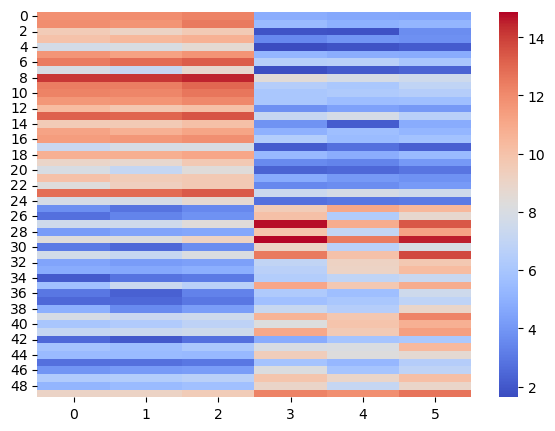

In [28]:
# Filter out non-numeric columns from filtered_set
heatdata3_numeric = combined_updownproteins25.select_dtypes(include=[float, int]).to_numpy()

# Create the heatmap with numeric data
plt.figure(figsize=(7, 5))  # Adjust the figure size
sns.heatmap(heatdata3_numeric, cmap='coolwarm', cbar=True)

# Display the plot
plt.show()

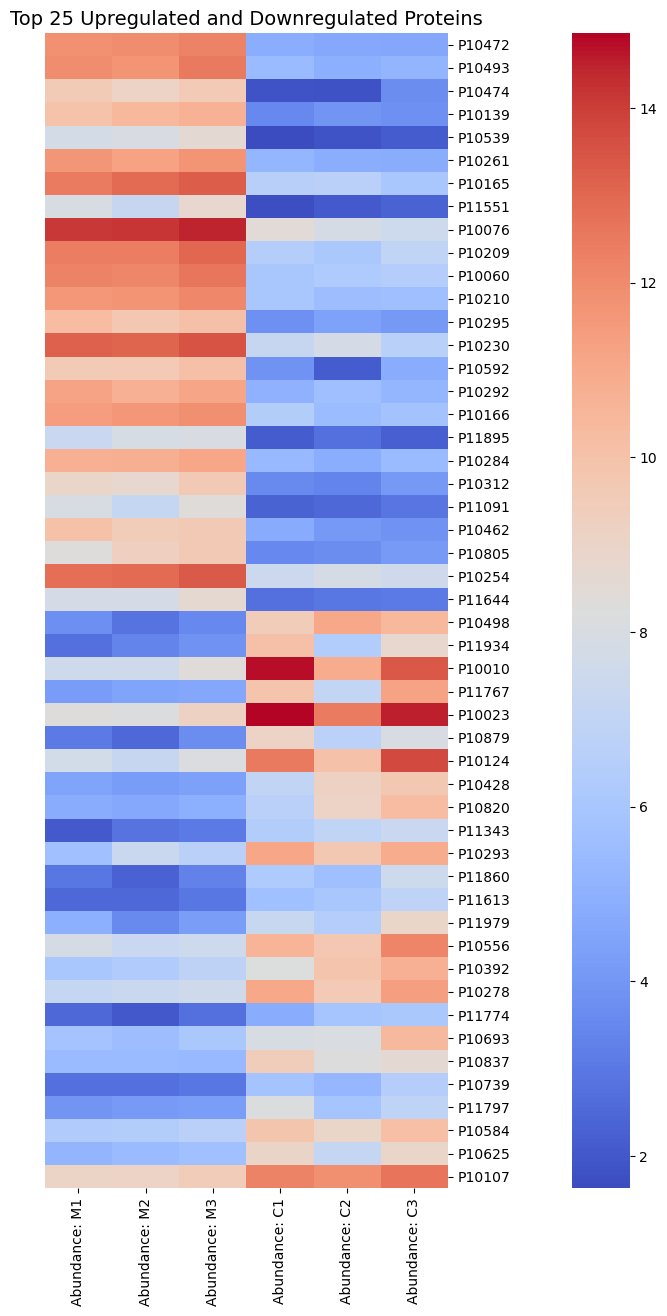

In [29]:
# Extract Accession labels if using MultiIndex
accession_labels = combined_updownproteins25.index.get_level_values(0)  # Change '0' if accessions are on a different level

# Create the heatmap with Accession labels on the y-axis and column names on the x-axis
plt.figure(figsize=(8, 15))  # Adjust the figure size
heatmap = sns.heatmap(
    heatdata3_numeric, 
    cmap='coolwarm', 
    cbar=True, 
    yticklabels=accession_labels,
    xticklabels=combined_updownproteins25.columns,  # Use column names for x-axis labels
    cbar_kws={"pad": 0.2}  # Adjust the pad value to increase space between heatmap and colorbar
)

# Move y-tick labels to the right
heatmap.yaxis.tick_right()
heatmap.yaxis.set_ticks_position('right')

# Set y-tick label rotation to horizontal
plt.yticks(rotation=0)  # Set rotation to 0 degrees for horizontal labels

# Set plot title
plt.title('Top 25 Upregulated and Downregulated Proteins', fontsize=14)

# Display the heatmap
plt.show()

In [30]:
combined25 = combined_updownproteins25.reset_index()
combined25

,Accession,Description,Abundance: M1,Abundance: M2,Abundance: M3,Abundance: C1,Abundance: C2,Abundance: C3
0,P10472,Protein 473,11.853037,11.920576,12.252222,4.882643,4.655352,4.596935
1,P10493,Protein 494,11.961920,11.738346,12.532307,5.412782,4.963474,5.193772
2,P10474,Protein 475,9.546123,9.074141,9.594138,1.887525,1.807355,3.666757
3,P10139,Protein 140,9.983421,10.443462,10.705460,3.536053,3.935460,3.765535
4,P10539,Protein 540,7.755555,8.018478,8.641691,1.632268,1.887525,2.104337
5,P10261,Protein 262,11.656738,11.259743,11.732591,5.247928,4.877744,4.791814
6,P10165,Protein 166,12.456585,12.900848,13.297490,6.551516,6.646739,5.997744
7,P11551,Protein 1552,7.965207,7.205549,8.791163,1.722466,2.070389,2.321928
8,P10076,Protein 77,14.109325,14.155103,14.469069,8.497053,7.846744,7.503031
9,P10209,Protein 210,12.378864,12.417088,12.997920,6.462707,6.123087,6.912889


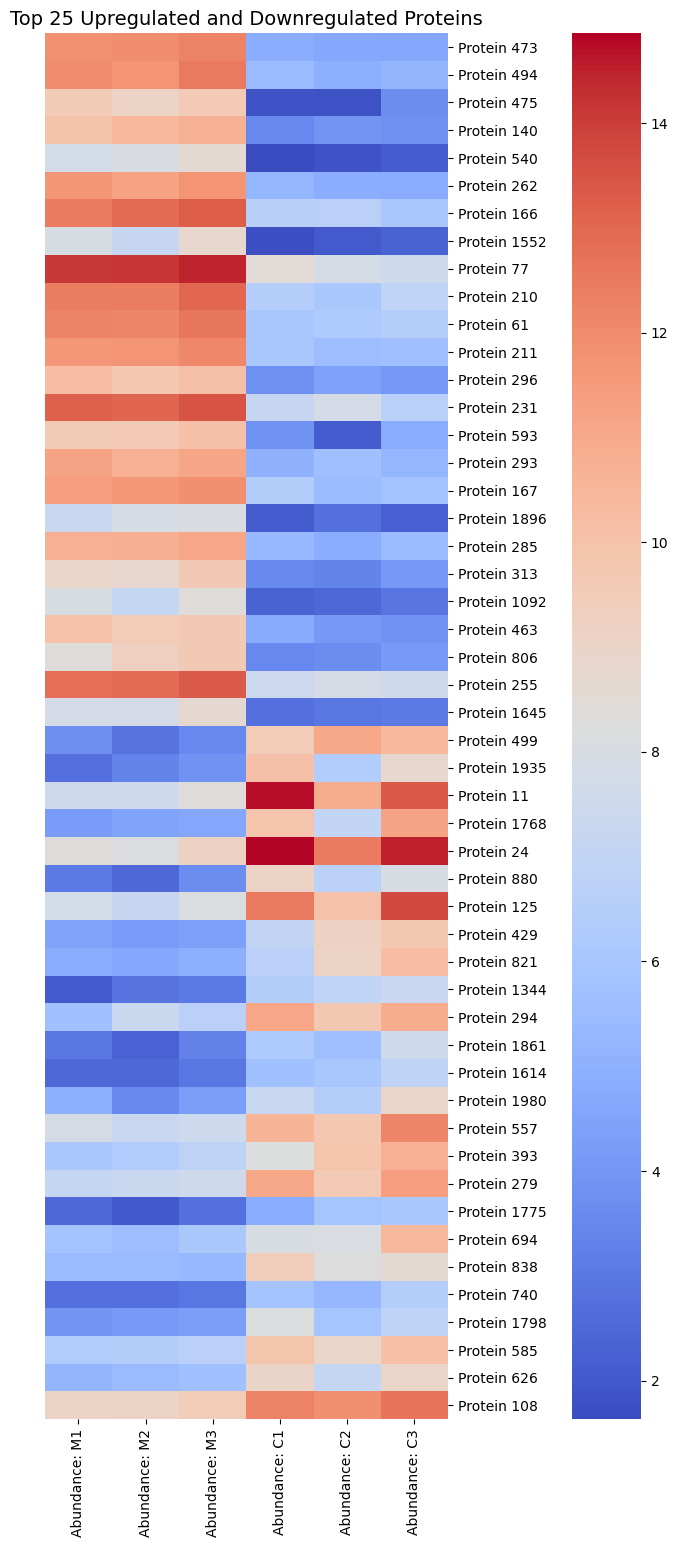

In [32]:
# Extract protein names from the combined50 DataFrame for y-axis labels
Description = combined25['Description'].values  # Get the values as a numpy array

# Create the heatmap with protein names on the y-axis and column names on the x-axis
plt.figure(figsize=(8, 18))  # Adjust the figure size
heatmap = sns.heatmap(
    heatdata3_numeric, 
    cmap='coolwarm', 
    cbar=True, 
    yticklabels=Description,  # Use protein numbers for y-axis labels
    xticklabels=combined_updownproteins25.columns,  # Use column names for x-axis labels
    cbar_kws={"pad": 0.2}  # Adjust the pad value to increase space between heatmap and colorbar
)

# Move y-tick labels to the right
heatmap.yaxis.tick_right()
heatmap.yaxis.set_ticks_position('right')

# Set y-tick label rotation to horizontal
plt.yticks(rotation=0)  # Set rotation to 0 degrees for horizontal labels

# Set plot title
plt.title('Top 25 Upregulated and Downregulated Proteins', fontsize=14)

# Display the heatmap
plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


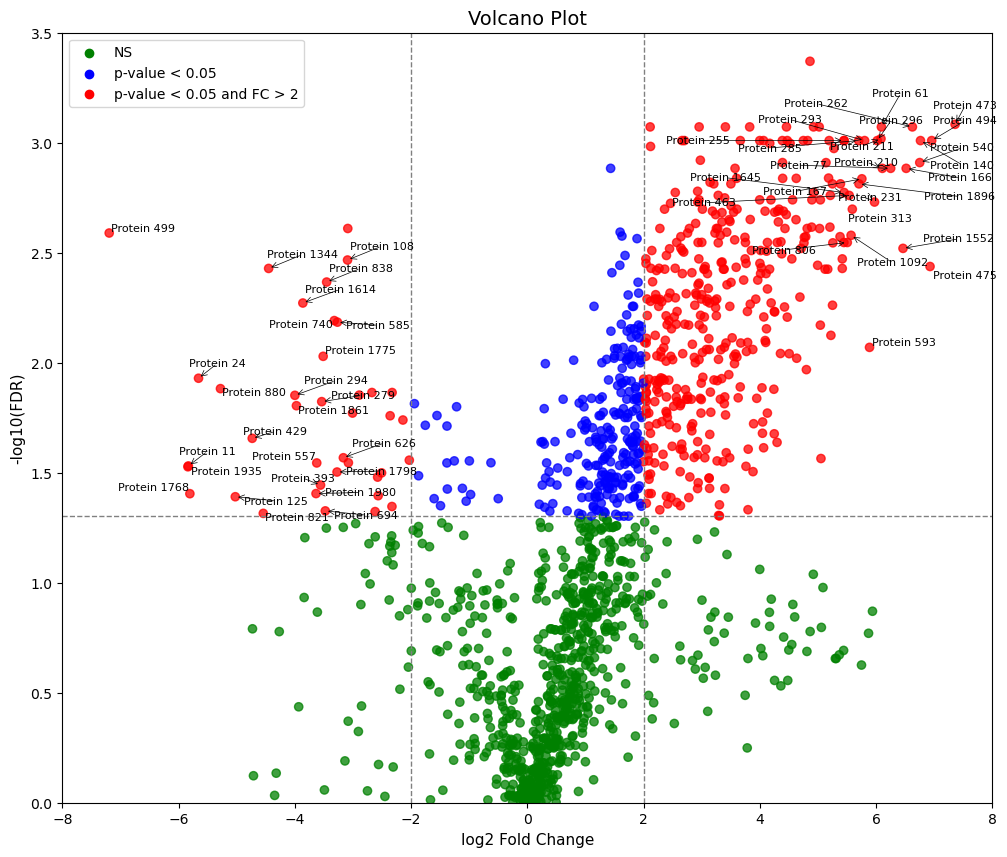

In [33]:
# Define thresholds
pCutoff = 0.05
FCcutoff = 2.0  # Log2 fold-change cutoff

# Create significance flags
allcounts_out['significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) > FCcutoff)
allcounts_out['pval_significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) <= FCcutoff)

# Merge dataframes on the 'Accession' column
merged_data = allcounts_out.merge(combined25, on='Accession', how='left')

# Assign colors based on significance
colors = np.where(merged_data['significant'], 'red',
         np.where(merged_data['pval_significant'], 'blue', 'green'))

# Create the volcano plot
plt.figure(figsize=(12, 10))
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75)

# Add significance threshold lines
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# Collect text labels to adjust later
texts = []

for i, row in merged_data.iterrows():
    protein_name = row['Description_x'] if pd.notna(row['Description_x']) else row['Description_x']
    
    # Check if the protein is in the list and if it's significant
    if protein_name in combined25['Description'].values or protein_name in combined25['Description'].values:
        texts.append(plt.text(row['log2FC'], -np.log10(row['fdr']), protein_name, fontsize=8))

# Adjust text to reduce overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='black', lw=0.5),  # Optional: Add arrows for clarity
    expand_points=(1.2, 1.2),  # Adjusts spacing around points
    expand_text=(1.2, 1.2),  # Adjusts spacing around text
    force_text=0.7,  # Reduces overlap force
    force_points=0.3  # Adjusts distance of text from points
)


# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])  # Adjust limits as needed

# Add plot title
plt.title('Volcano Plot', fontsize=14)

# Add custom legend
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()


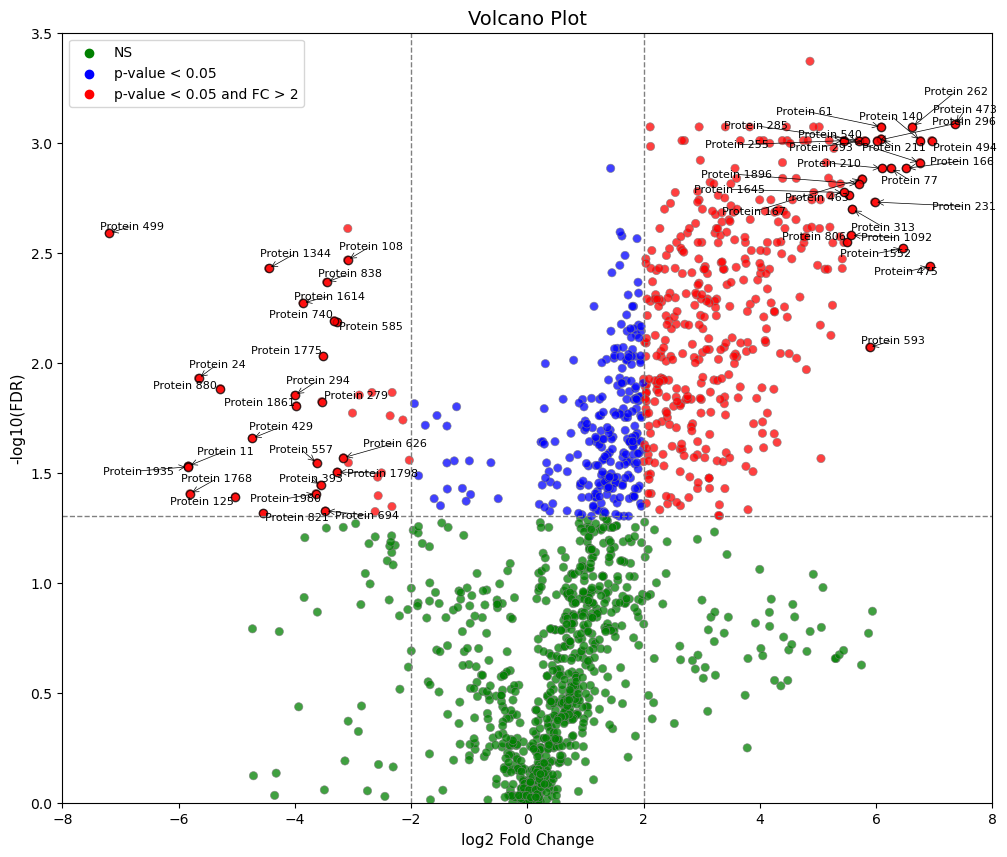

In [34]:
# Define thresholds
pCutoff = 0.05
FCcutoff = 2.0  # Log2 fold-change cutoff

# Create significance flags
allcounts_out['significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) > FCcutoff)
allcounts_out['pval_significant'] = (allcounts_out['fdr'] < pCutoff) & (abs(allcounts_out['log2FC']) <= FCcutoff)

# Merge dataframes on the 'Accession' column
merged_data = allcounts_out.merge(combined25, on='Accession', how='left')

# Assign colors based on significance
colors = np.where(merged_data['significant'], 'red',
         np.where(merged_data['pval_significant'], 'blue', 'green'))

# Create the volcano plot
plt.figure(figsize=(12, 10))

# Plot all points with no fill (transparent) and outlined
plt.scatter(merged_data['log2FC'], -np.log10(merged_data['fdr']), c=colors, alpha=0.75, facecolor='none', edgecolor='gray', linewidth=0.5)

# Add significance threshold lines
plt.axhline(y=-np.log10(pCutoff), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=FCcutoff, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-FCcutoff, color='grey', linestyle='--', linewidth=1)

# Collect text labels to adjust later
texts = []

# Plot outlined points for labeled proteins
for i, row in merged_data.iterrows():
    protein_name = row['Description_x'] if pd.notna(row['Description_x']) else row['Description_x']
    
    # Check if the protein is in the list and if it's significant
    if protein_name in combined25['Description'].values or protein_name in combined25['Description'].values:
        # Plot the labeled protein with filled color and outline
        color = 'red' if row['significant'] else 'blue'  # Choose color based on significance
        plt.scatter(row['log2FC'], -np.log10(row['fdr']),
                    c=color, alpha=0.75, edgecolor='black', linewidth=1)  # Filled color for label
        
        # Add the label
        texts.append(plt.text(row['log2FC'], -np.log10(row['fdr']), protein_name, fontsize=8, ha='right'))

# Adjust text to reduce overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='black', lw=0.5),  # Optional: Add arrows for clarity
    expand_points=(1.2, 1.2),  # Adjusts spacing around points
    expand_text=(1.2, 1.2),  # Adjusts spacing around text
    force_text=0.7,  # Reduces overlap force
    force_points=0.3  # Adjusts distance of text from points
)

# Set axis labels
plt.xlabel('log2 Fold Change', fontsize=11)
plt.ylabel('-log10(FDR)', fontsize=11)

# Set x and y axis limits
plt.xlim([-8, 8])  # Adjust limits as needed
plt.ylim([0, 3.5])  # Adjust limits as needed

# Add plot title
plt.title('Volcano Plot', fontsize=14)

# Add custom legend
green_patch = plt.scatter([], [], color='green', label='NS')  # Non-significant
blue_patch = plt.scatter([], [], color='blue', label='p-value < 0.05')  # p-value < 0.05, but |log2FC| <= 2
red_patch = plt.scatter([], [], color='red', label='p-value < 0.05 and FC > 2')  # p-value < 0.05 and |log2FC| > 2

plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left')

# Show plot
plt.show()
